In [1]:
'''
35100005_visualization 
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../dataset/35100005.csv")


# step 1 data wrangling

In [3]:
df.head()

,REF_DATE,GEO,DGUID,Admissions and releases,Correctional services,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Total correctional services,Number,223,units,0,v32445599,1.1.1,70542.0,NaN,NaN,NaN,0
1,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Pre-trial detention,Number,223,units,0,v32445600,1.1.2,16010.0,NaN,NaN,NaN,0
2,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Provincial director remand,Number,223,units,0,v32445601,1.1.3,NaN,..,NaN,NaN,0
3,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Secure custody,Number,223,units,0,v32445602,1.1.4,8019.0,NaN,NaN,NaN,0
4,1997/1998,Provinces and territories,2016A000011124,Youth admissions,Custody and supervision (secure),Number,223,units,0,v32445603,1.1.5,NaN,..,NaN,t,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 3424 non-null   object 
 1   GEO                      3424 non-null   object 
 2   DGUID                    3304 non-null   object 
 3   Admissions and releases  3424 non-null   object 
 4   Correctional services    3424 non-null   object 
 5   UOM                      3424 non-null   object 
 6   UOM_ID                   3424 non-null   int64  
 7   SCALAR_FACTOR            3424 non-null   object 
 8   SCALAR_ID                3424 non-null   int64  
 9   VECTOR                   3424 non-null   object 
 10  COORDINATE               3424 non-null   object 
 11  VALUE                    2356 non-null   float64
 12  STATUS                   1068 non-null   object 
 13  SYMBOL                   0 non-null      float64
 14  TERMINATED              

In [5]:
df.describe()

,UOM_ID,SCALAR_ID,VALUE,SYMBOL,DECIMALS
count,3424.0,3424.0,2356.000000,0.0,3424.0
mean,223.0,0.0,763.614601,NaN,0.0
std,0.0,0.0,2217.137639,NaN,0.0
min,223.0,0.0,0.000000,NaN,0.0
25%,223.0,0.0,9.000000,NaN,0.0
50%,223.0,0.0,65.500000,NaN,0.0
75%,223.0,0.0,350.000000,NaN,0.0
max,223.0,0.0,25655.000000,NaN,0.0


In [6]:
# replace missing values with 0
df['VALUE'].replace(np.nan,0.0001,inplace=True)

In [7]:
df['VALUE'].iloc[61:73]

61     22.0000
62      9.0000
63      7.0000
64      0.0001
65      0.0001
66     22.0000
67      0.0001
68      0.0001
69    257.0000
70     37.0000
71      0.0001
72      1.0000
Name: VALUE, dtype: float64

In [24]:
# test
df_test = df
df_test1 = df_test[df_test['Admissions and releases'] =='Youth admissions']
df_test1.tail()
df_test1 = df_test1[df_test1['Correctional services'] =='Total correctional services']
df_test1.tail()
# df_test3 = df_test[df_test['Admissions and releases'] =='Youth admissions',df_test['Correctional services'] =='Total correctional services']
# df_test3.tail()


,REF_DATE,GEO,DGUID,Admissions and releases,Correctional services,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
3314,2021/2022,Alberta,2016A000248,Youth admissions,Total correctional services,Number,223,units,0,v32445863,12.1.1,2057.0,NaN,NaN,NaN,0
3336,2021/2022,British Columbia,2016A000259,Youth admissions,Total correctional services,Number,223,units,0,v32445887,13.1.1,1461.0,NaN,NaN,NaN,0
3358,2021/2022,Yukon,2016A000260,Youth admissions,Total correctional services,Number,223,units,0,v32445903,14.1.1,11.0,NaN,NaN,NaN,0
3380,2021/2022,Northwest Territories,2016A000261,Youth admissions,Total correctional services,Number,223,units,0,v32445923,16.1.1,36.0,NaN,NaN,NaN,0
3402,2021/2022,Nunavut,2016A000262,Youth admissions,Total correctional services,Number,223,units,0,v32445941,17.1.1,11.0,NaN,NaN,NaN,0


# step2 data visualization
admissions and releases in the same line charts<br>
display the trend during ten years from 2012/2013 to 2021/2022 in each GEO<br>

In [8]:
geo_features = df.drop_duplicates(subset=["GEO"],keep='first')["GEO"]
geo_features = geo_features.tolist()
for name in ['Ontario, Ministry of Children and Youth Services (MCYS)','Ontario, Ministry of Community Safety and Correctional Services (MCSCS)']:
    geo_features.remove(name)
geo_features

['Provinces and territories',
 'Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia',
 'Yukon',
 'Northwest Territories',
 'Nunavut']

In [9]:
date_features = df.drop_duplicates(subset=["REF_DATE"],keep='first')["REF_DATE"]
date_features = date_features.tolist()
date_features

['2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [28]:
def plotAdmissionRelease(geo_features):
    for feature in geo_features:
        df_geo_0 = df[df.GEO==feature]
        df_geo_1 = df_geo_0[df_geo_0['Admissions and releases'] =='Youth admissions']
        df_geo_1 = df_geo_1[df_geo_1['Correctional services'] =='Total correctional services']
        df_geo_1.rename(columns={'Admissions and releases': 'Youth admissions value'}, inplace=True)
        df_geo_1.reset_index(drop=True, inplace=True)

        df_geo_2 = df_geo_0[df_geo_0['Admissions and releases'] =='Youth releases']
        df_geo_2 = df_geo_2[df_geo_2['Correctional services'] =='Total correctional services']

        df_geo_2.rename(columns={'Admissions and releases': 'Youth releases value'}, inplace=True)
        df_geo_2.reset_index(drop=True, inplace=True)
        df_year = pd.DataFrame({'REF_DATE':df_geo_1['REF_DATE'],'Youth admissions':df_geo_1['VALUE'],'Youth releases':df_geo_2['VALUE']})
        df_year.index = df_year['REF_DATE']
        
        positions = [i for i in range(10)]
        labels = date_features
        ax = df_year.plot(figsize=(12,6),title= feature,x_compat=True)
        ax.set_xticks(positions)
        ax.set_xticklabels(labels)
        # df_year.plot()

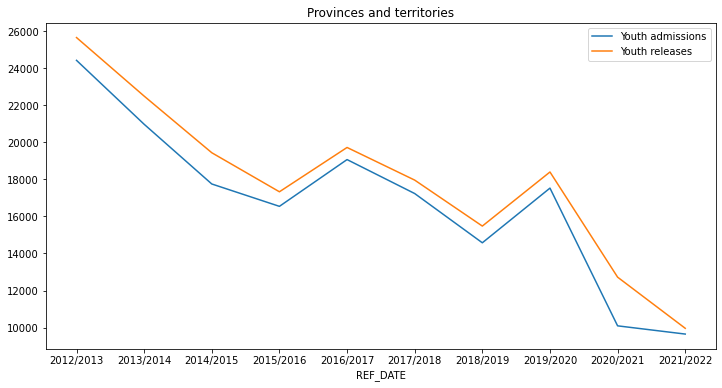

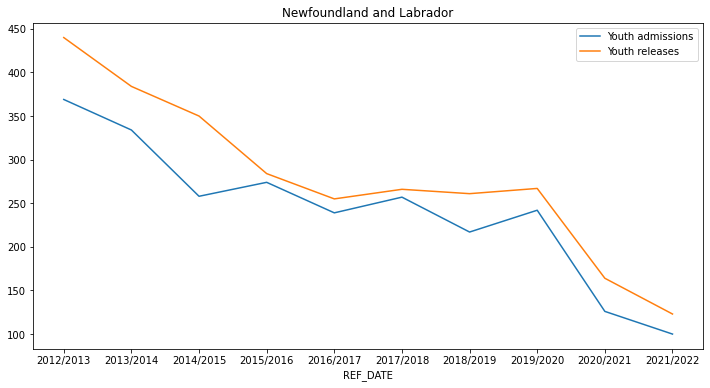

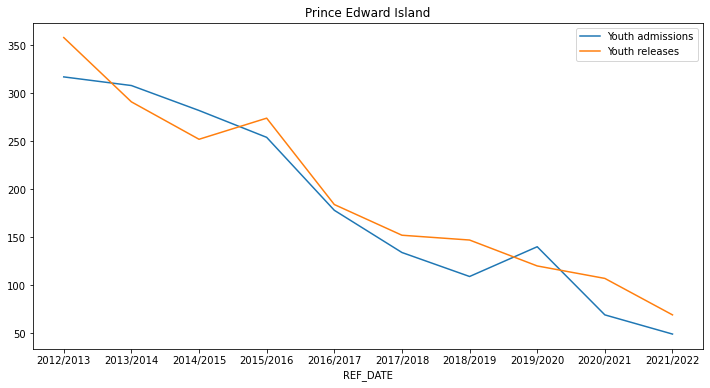

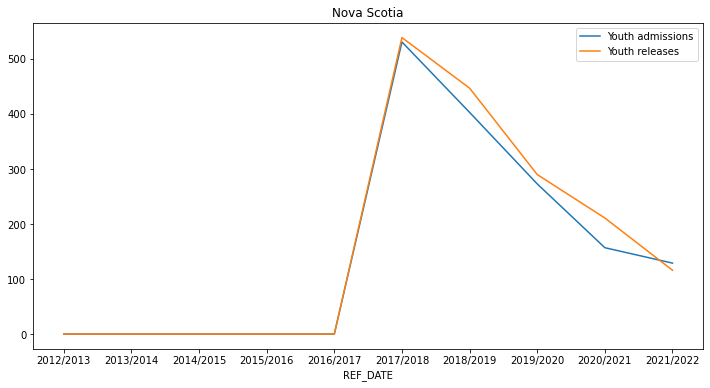

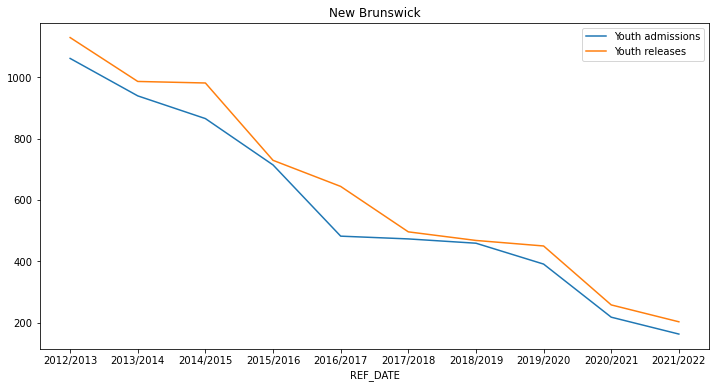

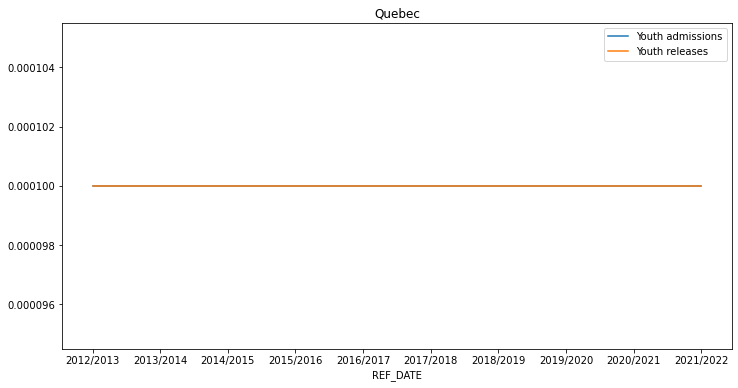

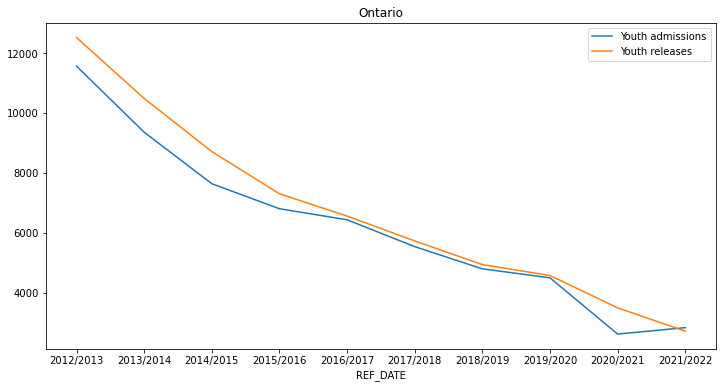

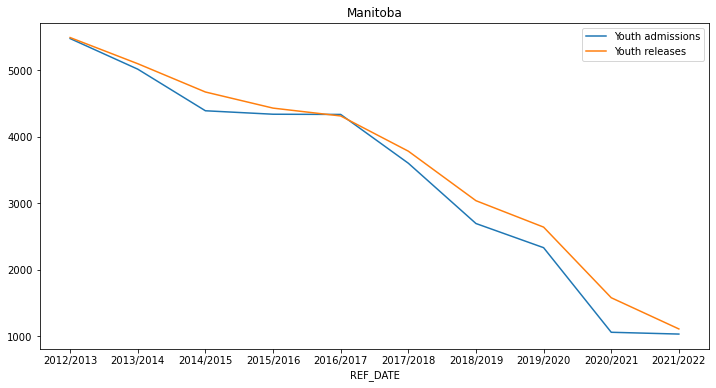

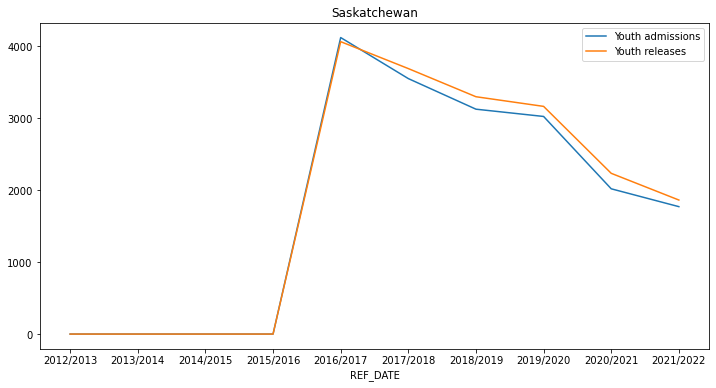

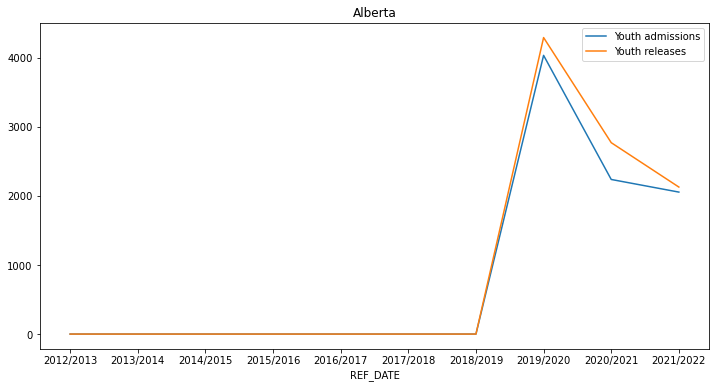

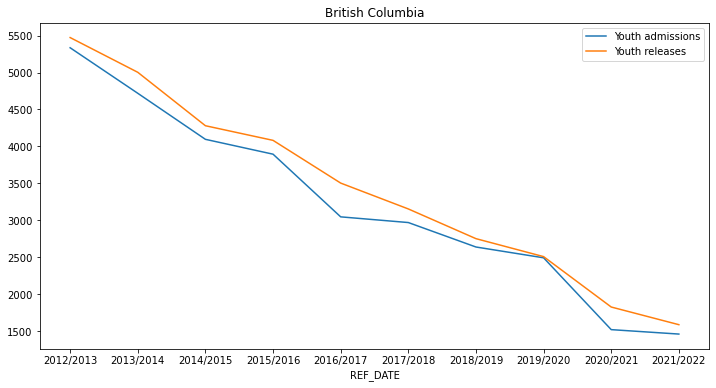

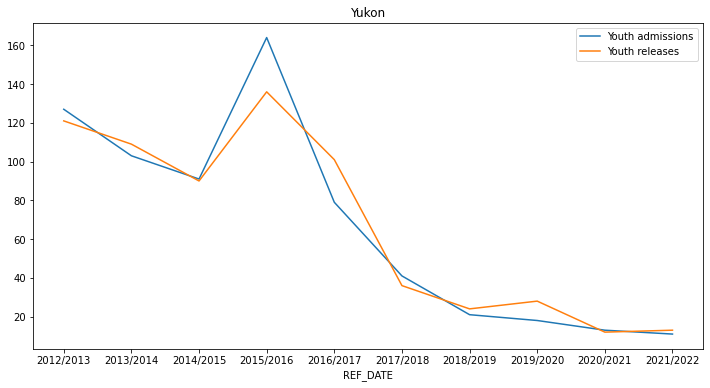

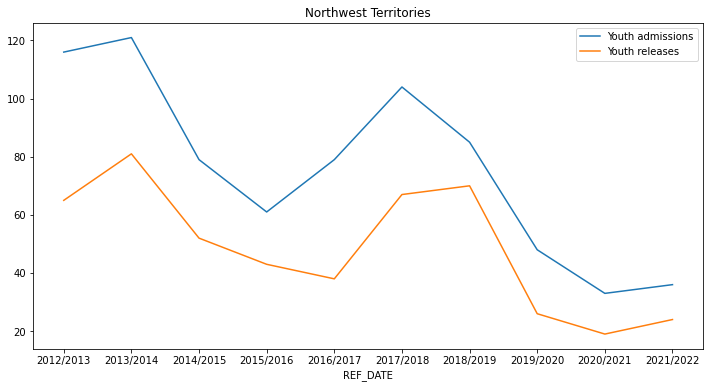

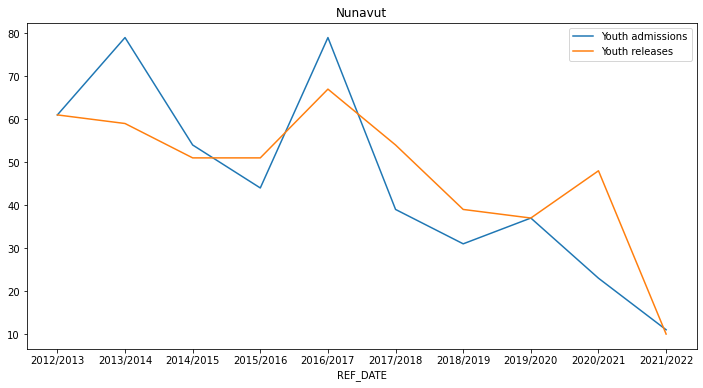

In [29]:
plotAdmissionRelease(geo_features)